### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.metrics import matthews_corrcoef
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_score, recall_score
from scipy.stats import norm

In [2]:
warnings.filterwarnings('ignore')

### Loading the data

The data can be found here: https://www.kaggle.com/datasets/somewhatrandomdata/random-medical?resource=download

In [3]:
medical_data = pd.read_csv('../data/medical_data.csv', index_col=0)

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
medical_data.head()

,sex,age,marital,income,state_code,obese,asthma,arthritis,depression,migraine,osteoporosis,cancer,bipolar_disorder,schizophrenia,major_depressive_disorder,generalized_anxiety_disorder,obsessive_compulsive_disorder,heart_attack,high_blood_pressure,high_cholesterol,smoker,stroke,diabetes,physical_activity,heavy_alcohol_consumption,chronic_obstructive_pulmonary_disease,thyroid_disorder,allergies,gastroesophageal_reflux_disease,sleep_apnea,fibromyalgia,irritable_bowel_syndrome,chronic_kidney_disease,back_pain,hepatitis,rheumatoid_arthritis,alzheimer,epilepsy,psoriasis,multiple_sclerosis,parkinson,celiac_disease,endometriosis,lupus
0,0,70,0,136480.40,DE,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,1,0,1
1,0,91,0,247620.82,NC,1,0,0,0,0,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,1,1,0,0,0,0,0,0
2,0,59,0,95551.06,TX,1,0,0,0,1,0,0,1,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,1,0,0
3,0,92,0,37194.94,GA,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1
4,0,95,0,91107.50,CO,0,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,0


In [5]:
medical_data.shape

(229762, 44)

**Strech goal:** analyze the relationship between marital status and depression.

   There are two variables indicating if the individual has depression, one is called 'depression', the other one is called 'major_depressive_disorder'. There is not enough documentation about the data set based on which to derive the difference between the two. I can assume two possibilities:
   1) depression is any kind of depression (mild or major), while major_depressive_disorder is the major one
   2) depression indicates not major , and then we have another column for major

By analyzing the data further we might be able to get more insights into which option is more likely. For example, if 1) represents the reality, then it is not possible that depression = 0 and major_depressive_disorder = 1. On the other hand, if 2) represents the reality, then it is not possible that depression = 1 and major_depressive_disorder = 1. Eventually we might reject both 1) and 2) if the data disproves them.

### Data Exploration

#### Exploring general characteristics of the data

In [6]:
medical_data.describe()

,sex,age,marital,income,obese,asthma,arthritis,depression,migraine,osteoporosis,cancer,bipolar_disorder,schizophrenia,major_depressive_disorder,generalized_anxiety_disorder,obsessive_compulsive_disorder,heart_attack,high_blood_pressure,high_cholesterol,smoker,stroke,diabetes,physical_activity,heavy_alcohol_consumption,chronic_obstructive_pulmonary_disease,thyroid_disorder,allergies,gastroesophageal_reflux_disease,sleep_apnea,fibromyalgia,irritable_bowel_syndrome,chronic_kidney_disease,back_pain,hepatitis,rheumatoid_arthritis,alzheimer,epilepsy,psoriasis,multiple_sclerosis,parkinson,celiac_disease,endometriosis,lupus
count,229762.000000,229762.000000,229762.000000,229762.000000,229762.000000,229762.000000,229762.000000,229762.000000,229762.000000,229762.000000,229762.000000,229762.000000,229762.000000,229762.000000,229762.000000,229762.000000,229762.000000,229762.000000,229762.000000,229762.000000,229762.000000,229762.000000,229762.000000,229762.000000,229762.00000,229762.000000,229762.000000,229762.000000,229762.000000,229762.000000,229762.000000,229762.000000,229762.000000,229762.000000,229762.000000,229762.000000,229762.000000,229762.000000,229762.000000,229762.000000,229762.000000,229762.000000,229762.000000
mean,0.439237,58.452699,0.300624,139627.472518,0.301368,0.298970,0.299932,0.299266,0.299654,0.299636,0.298626,0.300742,0.300646,0.299088,0.302300,0.299549,0.103202,0.454431,0.441753,0.465682,0.044755,0.172875,0.733389,0.060715,0.30005,0.299123,0.300894,0.300041,0.297895,0.300302,0.299632,0.299954,0.302117,0.297573,0.298861,0.301347,0.300790,0.298531,0.298722,0.300359,0.300594,0.300372,0.299858
std,0.496295,23.366982,0.458530,63521.953118,0.458853,0.457808,0.458229,0.457938,0.458107,0.458100,0.457657,0.458582,0.458540,0.457859,0.459255,0.458062,0.304224,0.497920,0.496597,0.498822,0.206766,0.378140,0.442188,0.238807,0.45828,0.457875,0.458648,0.458276,0.457334,0.458390,0.458098,0.458238,0.459177,0.457192,0.457760,0.458844,0.458602,0.457614,0.457699,0.458415,0.458517,0.458421,0.458197
min,0.000000,18.000000,0.000000,30000.790000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,38.000000,0.000000,84658.975000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,58.000000,0.000000,139425.145000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,79.000000,1.000000,194568.150000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,99.000000,1.000000,249999.430000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000

In [7]:
medical_data.state_code.value_counts()

state_code
SC    4727
MI    4718
VA    4713
NY    4712
DE    4677
MA    4674
VT    4671
OK    4659
NC    4655
NV    4653
MD    4630
SD    4629
MS    4627
AK    4625
OH    4620
NJ    4620
RI    4613
MN    4610
CA    4605
IN    4603
ND    4603
NM    4603
KS    4603
AR    4596
TN    4595
ME    4593
CT    4590
CO    4582
WI    4579
NH    4579
GA    4575
ID    4573
LA    4569
TX    4564
AL    4564
MO    4559
IL    4556
KY    4554
NE    4552
WA    4549
HI    4545
WY    4542
UT    4536
OR    4534
FL    4532
WV    4522
IA    4519
PA    4515
AZ    4505
MT    4433
Name: count, dtype: int64

The data seems to be equally distributed between the states.

In [8]:
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229762 entries, 0 to 253660
Data columns (total 44 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   sex                                    229762 non-null  int64  
 1   age                                    229762 non-null  int64  
 2   marital                                229762 non-null  int64  
 3   income                                 229762 non-null  float64
 4   state_code                             229762 non-null  object 
 5   obese                                  229762 non-null  int64  
 6   asthma                                 229762 non-null  int64  
 7   arthritis                              229762 non-null  int64  
 8   depression                             229762 non-null  int64  
 9   migraine                               229762 non-null  int64  
 10  osteoporosis                           229762 non-null  int64

In [9]:
cat_columns = [col for col in medical_data.columns if col not in ['state_code', 'age', 'income']]

for col in cat_columns:
    print(medical_data[col].value_counts())
    

sex
0    128842
1    100920
Name: count, dtype: int64
marital
0    160690
1     69072
Name: count, dtype: int64
obese
0    160519
1     69243
Name: count, dtype: int64
asthma
0    161070
1     68692
Name: count, dtype: int64
arthritis
0    160849
1     68913
Name: count, dtype: int64
depression
0    161002
1     68760
Name: count, dtype: int64
migraine
0    160913
1     68849
Name: count, dtype: int64
osteoporosis
0    160917
1     68845
Name: count, dtype: int64
cancer
0    161149
1     68613
Name: count, dtype: int64
bipolar_disorder
0    160663
1     69099
Name: count, dtype: int64
schizophrenia
0    160685
1     69077
Name: count, dtype: int64
major_depressive_disorder
0    161043
1     68719
Name: count, dtype: int64
generalized_anxiety_disorder
0    160305
1     69457
Name: count, dtype: int64
obsessive_compulsive_disorder
0    160937
1     68825
Name: count, dtype: int64
heart_attack
0    206050
1     23712
Name: count, dtype: int64
high_blood_pressure
0    125351
1    104411
Na

This looks like a very clean data set with no missing data, most of the column are integers representing binary features, whether you have a cetain condition (1) or not (0). 

#### Exploring the two variables related to depression

In [10]:
medical_data.depression.value_counts()

depression
0    161002
1     68760
Name: count, dtype: int64

In [11]:
medical_data.major_depressive_disorder.value_counts()

major_depressive_disorder
0    161043
1     68719
Name: count, dtype: int64

In [12]:
pd.crosstab(medical_data.depression, medical_data.major_depressive_disorder)

major_depressive_disorder,0,1
depression,,
0,112789,48213
1,48254,20506


At this point both of my independent assumptions above got disproved so I will choose the variable major_depressiv_disorder and will work only with it. The reason I prefer it over the depression variable is that it is clearer what it means, it means major depressive disorder which is the official name of the clinical depression as defined by the World Health Organization.

#### Univariate analysis of the thyroid disease variable

In [13]:
medical_data.thyroid_disorder.value_counts()

thyroid_disorder
0    161035
1     68727
Name: count, dtype: int64

There is no additional information in the data set documentation with regards to what kind of thyroid disease this column represents, e.g. hypo or hyper thyroidism or something else, or it just represents any kind of thyroid disorder being registered. So we will just analyze the relationship between depression and thyroid disorder.

### Analyze the relationship between thyroid disorder and major drpressive disorder

One way we can explore the relationship is through the phi coefficient, or the Matthews correlation coefficient

In [14]:
matthews_corrcoef(medical_data['thyroid_disorder'], medical_data['major_depressive_disorder'])

0.0009258525338722352

That's a very small number. Let's look at the contingency table based on which the phi coefficient is calculated.

In [15]:
pd.crosstab(medical_data['thyroid_disorder'], medical_data['major_depressive_disorder'], normalize='all')

major_depressive_disorder,0,1
thyroid_disorder,,
0,0.491448,0.209430
1,0.209465,0.089658


Finally, let's build a logistic regression logistic_regression_balanced predicting the probability of having major_depressive_disorder and the the strength of the relationship with thyroid disorder.

### Predict major depressive disorder

In [16]:
data_categorical = medical_data.select_dtypes(include='int')
data_categorical = data_categorical.drop(columns = 'age', axis = 1)
data_categorical.head(2)

,sex,marital,obese,asthma,arthritis,depression,migraine,osteoporosis,cancer,bipolar_disorder,schizophrenia,major_depressive_disorder,generalized_anxiety_disorder,obsessive_compulsive_disorder,heart_attack,high_blood_pressure,high_cholesterol,smoker,stroke,diabetes,physical_activity,heavy_alcohol_consumption,chronic_obstructive_pulmonary_disease,thyroid_disorder,allergies,gastroesophageal_reflux_disease,sleep_apnea,fibromyalgia,irritable_bowel_syndrome,chronic_kidney_disease,back_pain,hepatitis,rheumatoid_arthritis,alzheimer,epilepsy,psoriasis,multiple_sclerosis,parkinson,celiac_disease,endometriosis,lupus
0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,1,0,1
1,0,0,1,0,0,0,0,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,1,1,0,0,0,0,0,0


#### Check for multicollinearity

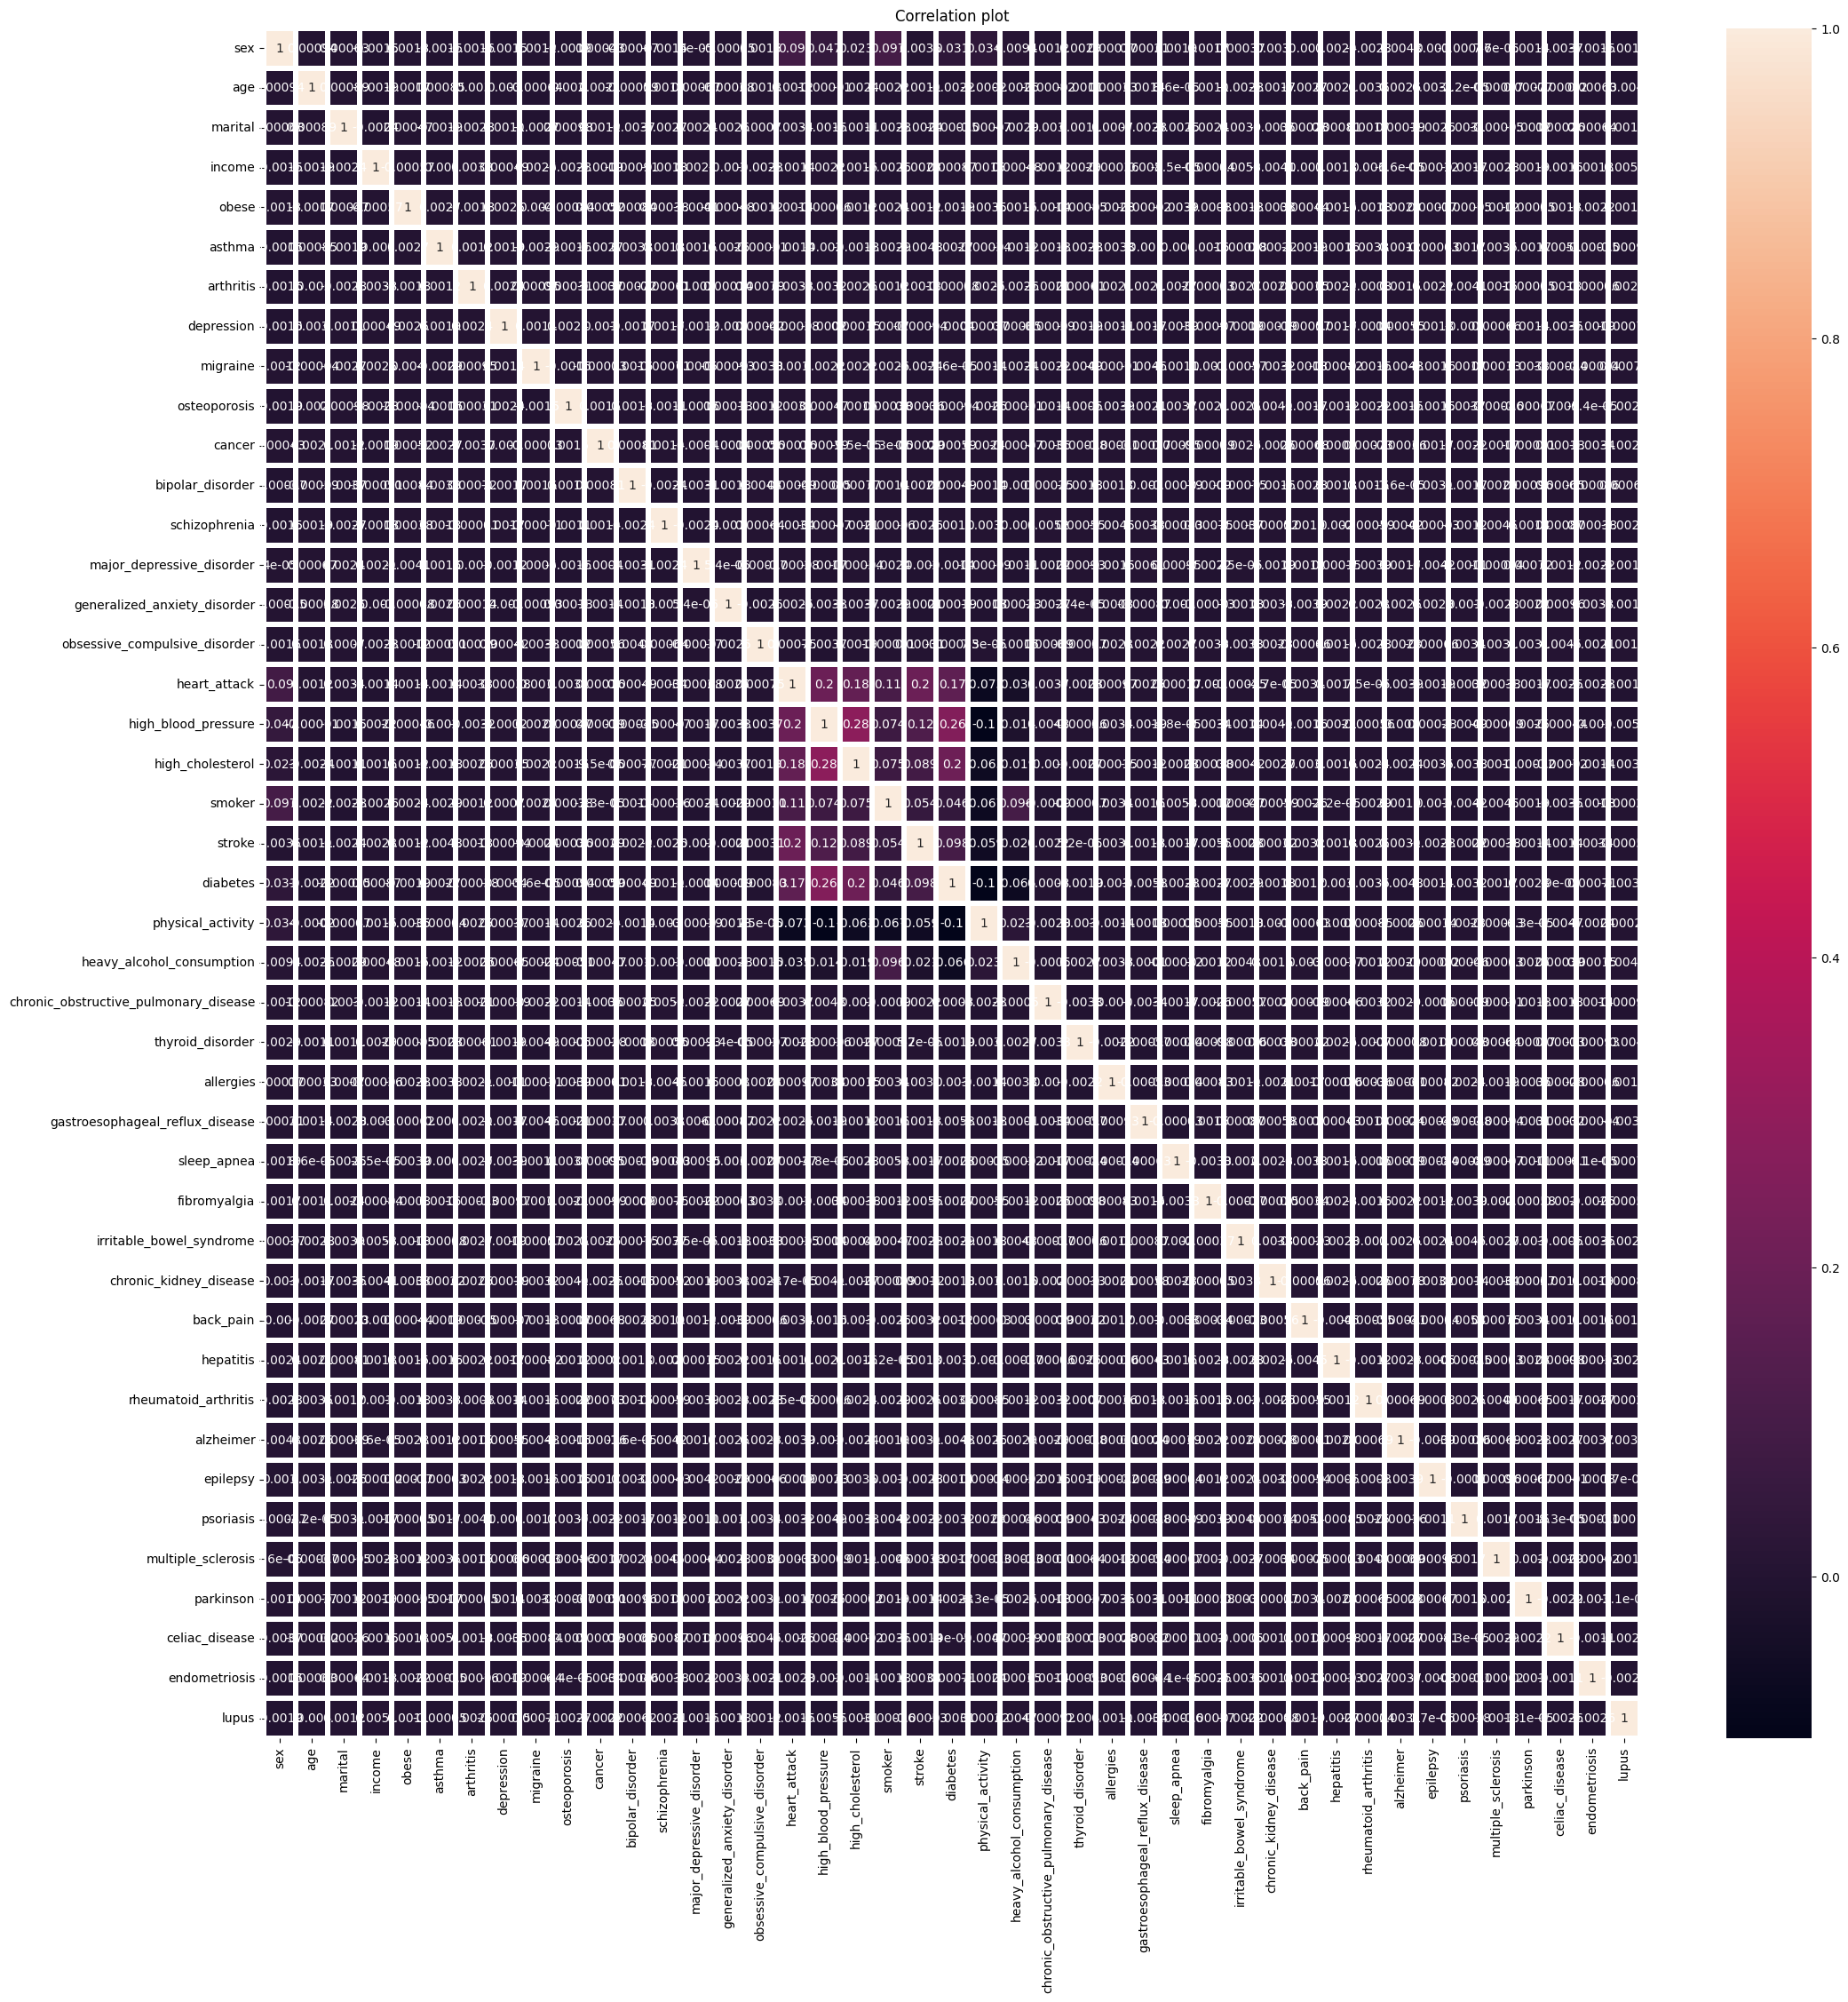

In [17]:
# Calculate Pearson's correlation
data_correlation = medical_data.drop(columns='state_code', axis=1)

plt.figure(figsize=(25, 25))
corr_plot = sns.heatmap(data_correlation.corr(), annot = True, linewidths=3) # Calculating Pearson correlation
plt.title("Correlation plot")
plt.show()

In [18]:
# Calculate phi coefficient

data_categorical = medical_data.select_dtypes(include = 'int')
data_categorical = data_categorical.drop(columns = 'age', axis = 1)
data_categorical.head(2)

,sex,marital,obese,asthma,arthritis,depression,migraine,osteoporosis,cancer,bipolar_disorder,schizophrenia,major_depressive_disorder,generalized_anxiety_disorder,obsessive_compulsive_disorder,heart_attack,high_blood_pressure,high_cholesterol,smoker,stroke,diabetes,physical_activity,heavy_alcohol_consumption,chronic_obstructive_pulmonary_disease,thyroid_disorder,allergies,gastroesophageal_reflux_disease,sleep_apnea,fibromyalgia,irritable_bowel_syndrome,chronic_kidney_disease,back_pain,hepatitis,rheumatoid_arthritis,alzheimer,epilepsy,psoriasis,multiple_sclerosis,parkinson,celiac_disease,endometriosis,lupus
0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,1,0,1
1,0,0,1,0,0,0,0,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,1,1,0,0,0,0,0,0


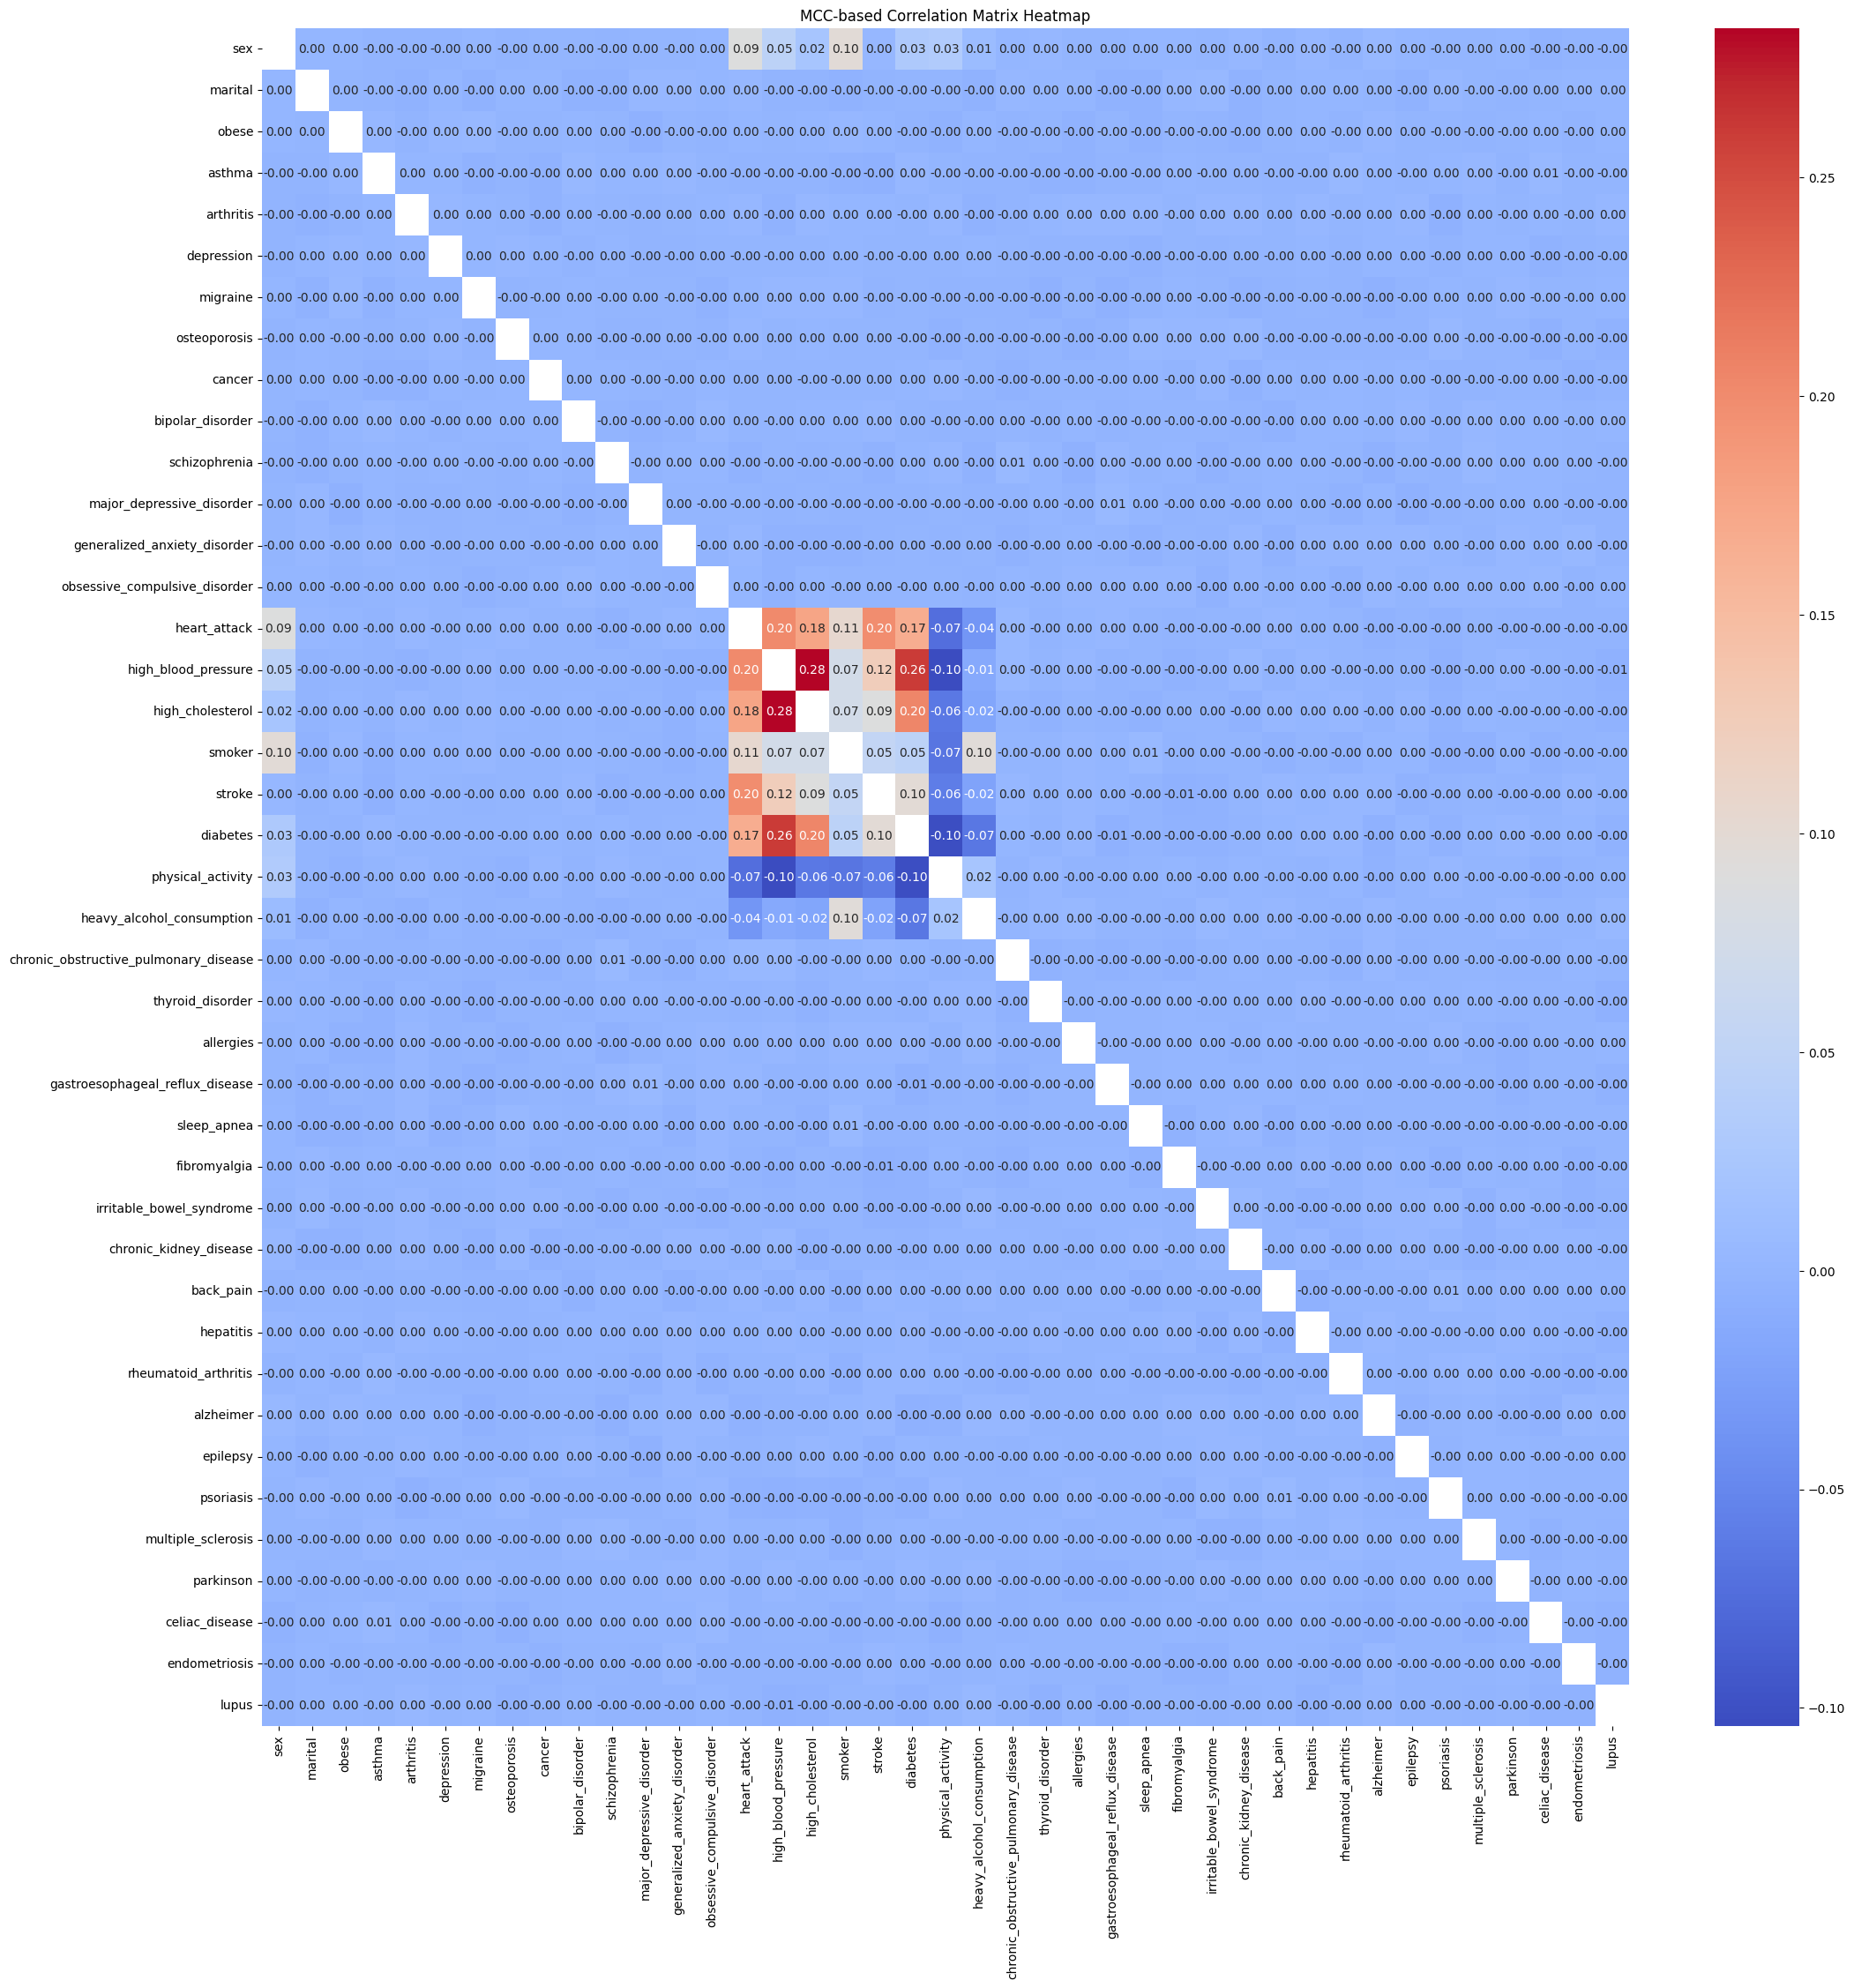

In [19]:
mcc_matrix = pd.DataFrame(index=data_categorical.columns, columns=data_categorical.columns)

for col1 in data_categorical.columns:
    for col2 in data_categorical.columns:
        mcc = matthews_corrcoef(data_categorical[col1], data_categorical[col2])
        mcc_matrix.loc[col1, col2] = mcc

np.fill_diagonal(mcc_matrix.values, np.nan)

plt.figure(figsize=(25, 25))
sns.heatmap(mcc_matrix.astype(float), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('MCC-based Correlation Matrix Heatmap')
plt.show()

There is almost no linear relationship between depression and any of the other categorical variables (state_code was not included in the analysis), including thyroid disorder.



### Prepare data for logistic_regression_balancedling

In [20]:
logistic_regression_balancedling_data = medical_data.copy()
logistic_regression_balancedling_data.head(2)

,sex,age,marital,income,state_code,obese,asthma,arthritis,depression,migraine,osteoporosis,cancer,bipolar_disorder,schizophrenia,major_depressive_disorder,generalized_anxiety_disorder,obsessive_compulsive_disorder,heart_attack,high_blood_pressure,high_cholesterol,smoker,stroke,diabetes,physical_activity,heavy_alcohol_consumption,chronic_obstructive_pulmonary_disease,thyroid_disorder,allergies,gastroesophageal_reflux_disease,sleep_apnea,fibromyalgia,irritable_bowel_syndrome,chronic_kidney_disease,back_pain,hepatitis,rheumatoid_arthritis,alzheimer,epilepsy,psoriasis,multiple_sclerosis,parkinson,celiac_disease,endometriosis,lupus
0,0,70,0,136480.40,DE,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,1,0,1
1,0,91,0,247620.82,NC,1,0,0,0,0,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,1,1,0,0,0,0,0,0


In [21]:
logistic_regression_balancedling_data = logistic_regression_balancedling_data.drop(columns = 'depression', axis = 1)

In [22]:
y = logistic_regression_balancedling_data[['major_depressive_disorder']].copy(deep=True).reset_index(drop = True)
x = logistic_regression_balancedling_data.drop('major_depressive_disorder', axis=1).reset_index(drop = True)

#### One-hot encoding

In [23]:
encoder = OneHotEncoder(sparse_output = False, drop = 'first')
encoded_data = encoder.fit_transform(x[['state_code']])
encoded_data

encoded_df = pd.DataFrame(encoded_data, 
                          columns=encoder.get_feature_names_out(['state_code'])).reset_index(drop = True)

x = pd.concat([x.drop('state_code', axis=1), encoded_df], axis=1)
x = x.astype('int')
x.head()

,sex,age,marital,income,obese,asthma,arthritis,migraine,osteoporosis,cancer,bipolar_disorder,schizophrenia,generalized_anxiety_disorder,obsessive_compulsive_disorder,heart_attack,high_blood_pressure,high_cholesterol,smoker,stroke,diabetes,physical_activity,heavy_alcohol_consumption,chronic_obstructive_pulmonary_disease,thyroid_disorder,allergies,gastroesophageal_reflux_disease,sleep_apnea,fibromyalgia,irritable_bowel_syndrome,chronic_kidney_disease,back_pain,hepatitis,rheumatoid_arthritis,alzheimer,epilepsy,psoriasis,multiple_sclerosis,parkinson,celiac_disease,endometriosis,lupus,state_code_AL,state_code_AR,state_code_AZ,state_code_CA,state_code_CO,state_code_CT,state_code_DE,state_code_FL,state_code_GA,state_code_HI,state_code_IA,state_code_ID,state_code_IL,state_code_IN,state_code_KS,state_code_KY,state_code_LA,state_code_MA,state_code_MD,state_code_ME,state_code_MI,state_code_MN,state_code_MO,state_code_MS,state_code_MT,state_code_NC,state_code_ND,state_code_NE,state_code_NH,state_code_NJ,state_code_NM,state_code_NV,state_code_NY,state_code_OH,state_code_OK,state_code_OR,state_code_PA,state_code_RI,state_code_SC,state_code_SD,state_code_TN,state_code_TX,state_code_UT,state_code_VA,state_code_VT,state_code_WA,state_code_WI,state_code_WV,state_code_WY
0,0,70,0,136480,0,1,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,91,0,247620,1,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,59,0,95551,1,0,0,1,0,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,92,0,37194,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,95,0,91107,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Train-test split 

No need to create a validation set as well because the whole goal of this logistic_regression_balanced is to evaluate the relatinship between two variables, it will not be used for actual prediction on new data afterwards.

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 123, train_size=0.7)

### Model fitting

In [25]:
logistic_regression_balanced = LogisticRegression(class_weight = 'balanced', penalty = None)
logistic_regression_balanced.fit(x_train,y_train)

,penalty,None
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


**Evaluate logistic_regression_balanced performance on test data**

In [26]:
# Calculate the probability of the sample to belong to the positive class
y_predicted_prob = logistic_regression_balanced.predict_proba(x_test)[:, 1] 

# Calculate the predicted labels on the test set (0.5 prob threshold used)
y_predicted = logistic_regression_balanced.predict(x_test)

# create onfusion matrix
cm = confusion_matrix(np.array(y_test), y_predicted)
index = ['actual no hypothyroidism', 'actual hypothyroidism']
columns = ['pred no hypothyroidism', 'pred hypothyroidism']
cm_df = pd.DataFrame(cm, index = index, columns = columns)
print('Confusion matrix')
print(cm_df)
print()

# ROC- AUC score
roc = roc_auc_score(y_test,y_predicted_prob)
print(f'ROC-AUC score test dataset: {roc:.2f}')
print()

# Precision score
precision = precision_score(y_test, y_predicted)
print(f'precision score  test dataset: {precision:.2f}')
print()

# Recall Score
recall = recall_score(y_test, y_predicted)
print(f'Recall score  test dataset: {recall:.2f}')

# F1 score
f1_score_stat = f1_score(y_test,y_predicted)
print(f'f1 score for base logistic_regression_balanced is : {f1_score_stat:.2f}')


Confusion matrix
                          pred no hypothyroidism  pred hypothyroidism
actual no hypothyroidism                   23701                24526
actual hypothyroidism                      10218                10484

ROC-AUC score test dataset: 0.50

precision score  test dataset: 0.30

Recall score  test dataset: 0.51
f1 score for base logistic_regression_balanced is : 0.38


Based on the performance metrics, this does not seem to be a good model which can make reliable predictions. Even so, we can still check the model coefficients and interpret them.

In [27]:
coefficients = logistic_regression_balanced.coef_[0]
intercept = logistic_regression_balanced.intercept_[0]

# Calculate standard errors of coefficients
n = len(y_train)
p = x_train.columns # These are the featues
std_errors = np.sqrt(np.diag(np.linalg.inv(x_train.T @ x_train)))

# Calculate z-scores and p-values for each coefficient
z_scores = coefficients / std_errors
p_values = [2 * (1 - norm.cdf(np.abs(z))) for z in z_scores]

# Create a DataFrame of features, coefficients, and p-values
df_summary = pd.DataFrame({
    'feature': p,
    'coefficient': coefficients,
    'z_score': z_scores,
    'p_value': p_values,
    'std': std_errors
})

df_summary_sorted = df_summary.reindex(df_summary['coefficient'].abs().sort_values(ascending=False).index).reset_index(drop=True)
df_summary_sorted

,feature,coefficient,z_score,p_value,std
0,epilepsy,-3.389985e-02,-6.247170,4.179563e-10,5.426434e-03
1,obese,-3.292747e-02,-6.077920,1.217512e-09,5.417555e-03
2,gastroesophageal_reflux_disease,2.936029e-02,5.408613,6.351455e-08,5.428432e-03
3,schizophrenia,-1.989882e-02,-3.665498,2.468577e-04,5.428681e-03
4,rheumatoid_arthritis,-1.664035e-02,-3.062451,2.195326e-03,5.433671e-03
5,back_pain,1.524337e-02,2.811804,4.926450e-03,5.421208e-03
6,parkinson,-1.446929e-02,-2.667692,7.637431e-03,5.423899e-03
7,heart_attack,1.270035e-02,1.465390,1.428147e-01,8.666878e-03
8,high_cholesterol,1.217633e-02,2.290517,2.199138e-02,5.315976e-03
9,high_blood_pressure,-1.204904e-02,-2.224980,2.608260e-02,5.415348e-03


The thyroid_disorder feature has a coefficient close to 0 (0.005) and a high p-value (30%), hence we can reject our hypothesis that the thyroid disease is related to major depressive disorder.